---------------------------------------------------------------------------------------------------------------------------
This tutorial relies on the example model provided by `dinsar`, which is built from real public datasets belonging to a small area near the Doñana National Park (southern Spain). The model can be accessed directly through  `dinsar.example.get_model()` and the relative paths to the data, through `dinsar.example.get_path()`.
For more information about the data sources, see the file *Data Sources.txt*, located in the same folder as this tutorial.

Fore **more information** about the use of any function, method, class o moduel, use `help` bult-in (or `?`) to acces its documentation:

`>>> help(dinsar.parts)` or press the **tabulator** key in Jupyter Notebook to access an object's methods.

---------------------------------------------------------------------------------------------------------------------------

<h1><center>Working with  model parts</center></h1>

tal y como se mencionó en el tutorial *Creating a dinsar model*, el Modelo de dinsar requiere de la adición de información para su correcto funcionamiento. A esta información nos referimos como las partes del modelo, y a través de ellas se introducen los datasets DInSAR (`Dataset` class) y las bases de datos de la zona (`Piezometria`, `Precipitacion` and `DataBase` classes). Among the latter, `Piezometria` and `Precipitacion` are specially designed to host piezometric and pluviometric databases, respectively, with data of any other nature being introduced through the `DataBase` class.

Todas las partes del modelo derivan de una clase común que permite acceder a características como el nombre de la parte (`name`), su unidad de medida (`units`) o, en caso de tener información espacial asociada (posible caso de las bases de datos), consultar la capa de los puntos (`gdf`; o un único punto: `take_point`), obtener las coordenadas de un sensor en concreto (`xy`) o seleccionar los sensores más cercanos a una ubicación determinada (`find_element`).

Puesto que la clase `Dataset` requiere de un archivo espacial para su construcción, estos últimos métodos espaciales siempre estarán disponibles. En el caso de las bases de datos, el uso de estos método requerirá la previa adición de información espacial a la parte a través de `append_geometry`. Se puede consultar si una parte tiene información espacial asociada a través de `has_geometry`.

Las partes se añaden al modelo a través de una relación de asociación. De esta manera, éstas se pueden manejar o bien desde fuera del modelo o a través del mismo. En este último caso, se realiza a través del método `get`.

## Obtaining information of one sensor

Los métodos `take_point`, `take` y `subset` permiten obtener información de uno o varios sensores. Las tres funciones presentan un único argumento de entrada ('points'), a través del cual se indica el nombre del sensor (como cadena de texto) o de los sensores (como lista de cadenas de texto) de los que se desea obtener información.

Se pueden consultar los sensores (o puntos) de cada parte a través del método `puntos` para la clase `Dataset` y `elementos` para las bases de datos. En estas últimas, en las de tipo `Piezometria` y `Precipitacion` también se puede acceder a ellos a través de los métodos `piezos` y `estaciones`, respectivamente.

- El método `take_point` permite obtener el geopandas.GeoDataFrame del sensor deseado (consulta [aquí](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) todas las funcionalidades de este objeto).

In [ ]:
Doñana.get('P').take_point(['Almonte', 'Niebla'])

In [ ]:
- El método `take` permite obtener las series temporales de los sensores, y únicamente está disponible para las clases de las bases de datos.

In [ ]:
- El método `subset` solo funciona para la clases Dataset

In [1]:
 # Cojo los cinco primeros PS del Dataset 'Ascending' (dessde fuera del modelo ) y calculo su deformación promedio
ps = Asc.ps[0:5] 
Asc.subset(ps).plot(plot_average=True)

# Cojo el primer piezómetro de la base de datos de piezometría y ploteo su serie temporal
piezo = bbdd.piezos[0]
bbdd.plot(piezo)

# A través del método 'take' accedo al array con su serie tempral: --> bbdd.take(piezo)

# Selecciono la estación de Almonte y ploteo su serie temporal según su desviación acumulada
# Puedo ver qué estaciones hay en la base de datos así: --> precipi.estaciones
precipi.plot('Almonte', values='dsv')

precipi.estaciones

NameError: name 'Asc' is not defined

In [1]:
import dinsar

Doñana = dinsar.example.get_model()

Geometría añadida correctamente.
Geometría añadida correctamente.


In [5]:
Doñana.get('Asc').take_point(['352866', '352918', '353090',  '353226', '353378', '353502'])

,ID,Lat,Lon,Topo,Vel,Coer,cosN,cosE,cosU,geometry,Dataset,Color
0,352866,37.261,-6.431,118.45,-0.630,0.894,-0.11,0.650,0.752,MULTIPOINT (195699.600 4129374.811),Asc,#99F550
1,352918,37.258,-6.433,116.88,-0.825,0.880,-0.11,0.650,0.752,MULTIPOINT (195538.025 4129010.588),Asc,#99F550
2,353090,37.264,-6.435,125.41,-0.504,0.883,-0.11,0.651,0.751,MULTIPOINT (195339.750 4129665.728),Asc,#99F550
3,353226,37.264,-6.438,123.99,-0.444,0.911,-0.11,0.651,0.751,MULTIPOINT (195117.973 4129673.793),Asc,#99F550
4,353378,37.265,-6.441,126.45,-0.367,0.866,-0.11,0.651,0.751,MULTIPOINT (194825.920 4129776.667),Asc,#99F550
5,353502,37.266,-6.445,130.79,-0.537,0.852,-0.11,0.651,0.751,MULTIPOINT (194537.272 4129972.785),Asc,#99F550


In [6]:
Doñana.get('P').take_point(['Almonte', 'Niebla'])

,Nombre,X,Y,geometry
0,Almonte,191221.0,4116990.0,POINT (191221.000 4116990.000)
1,Niebla,169098.0,4139930.0,POINT (169098.000 4139930.000)


In [7]:
Doñana.get('Piezo_bbdd').take_point(['104080065', '104130038', '104170015'])

,Nombre,X,Y,geometry
0,104080065,185214.000000,4.138422e+06,POINT (185214.000 4138422.000)
1,104130038,177874.000000,4.134454e+06,POINT (177874.000 4134454.000)
2,104170015,173685.324284,4.120077e+06,POINT (173685.324 4120076.591)


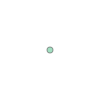

In [8]:
Doñana.get('Asc').xy('352866')